In [1]:
# This dataset is for sensor outdoor and paired with stationary and weather.
# the result should be compared with project_pipeline_ver1

In [34]:
import numpy as np
import pandas as pd
import keras
from keras.layers import Dense, Activation
from keras.models import Sequential
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score

In [3]:
Wearable = pd.read_excel('Data_Folder/Demo5_1/5_1_Wearable_Outside.xlsx',header=0,index_col=0)
Stationary = pd.read_excel('Data_Folder/Demo5_1/5_1_stationary.xlsx',header=0,index_col=False)
Weather = pd.read_csv('Data_Folder/Demo5_1/weather_5_01.txt',delimiter=',',header=None,index_col=False)
Weather.columns=['DTime','Bar','TempIn','HumIn','TempOut','Wind','Wind10','Wdir','HumOut','RainRate','UV','Solar']

In [4]:
Wearable2 = pd.read_excel('Data_Folder/Demo4_20/4_20_wearable_inside.xlsx',header=0,index_col=0)
Stationary2 = pd.read_excel('Data_Folder/Demo4_20/4_20_stationary.xlsx',header=0,index_col=False)
Weather2 = pd.read_csv('Data_Folder/Demo4_20/weather_4_20.txt',delimiter=',',header=None,index_col=False)
Weather2.columns=['DTime','Bar','TempIn','HumIn','TempOut','Wind','Wind10','Wdir','HumOut','RainRate','UV','Solar']

In [5]:
Stationary = Stationary.iloc[1:15389,:]
Wearable = Wearable.iloc[:602,:]
Weather = Weather.iloc[24:3585,:]

from datetime import datetime
Stationary = Stationary.resample('1T',on='TimeStamp').mean()

Weather.index = range(Weather.shape[0])

#Wearable.index = range(Wearable.shape[0])
from datetime import datetime
for i in range(Weather.shape[0]):
    Weather.set_value(i, 'New_Time', datetime.strptime(Weather.iloc[i,0], '%Y-%m-%d %H:%M:%S'))   

Weather = Weather.resample('1T', on='New_Time').mean()

Wearable.index = range(Wearable.shape[0])

Wearable.drop(columns=['Time(s)'],inplace=True)

Weather.drop(columns=['RainRate'],inplace=True)
Wearable.drop(Wearable.columns[0],axis=1,inplace=True)
Wearable.drop(columns=['Time'],inplace=True)

Stationary.index = range(Stationary.shape[0])
Weather.index = range(Weather.shape[0])

Stationary = Stationary.fillna(method='ffill')
Wearable = Wearable.fillna(method='ffill')
Weather = Weather.fillna(method='ffill')
#Wea_Stat = pd.concat([Weather, Stationary],axis=1)
#Wea_Stat

Wea_Stat = pd.concat([Weather, Stationary],axis=1)

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]


In [6]:
Wearable

,Violet,Blue,Green,Yellow,Orange,Red
0,271.0,517.0,446.0,573.0,377.0,371.0
1,34482.0,14588.0,33534.0,24423.0,40471.0,19920.0
2,46561.0,35610.0,47494.0,46024.0,44272.0,44892.0
3,47098.0,36002.0,47201.0,46219.0,44296.0,45786.0
4,47487.0,36593.0,47905.0,46504.0,44876.0,46565.0
5,48041.0,36423.0,49914.0,47003.0,46529.0,46765.0
6,49735.0,37087.0,51201.0,49732.0,49265.0,46620.0
7,51201.0,39891.0,51201.0,51201.0,51201.0,50316.0
8,51201.0,42284.0,51201.0,51201.0,50119.0,51201.0
9,51201.0,41685.0,51201.0,51201.0,50786.0,51201.0


In [7]:
Stationary2.drop([0,554],inplace=True)

from datetime import datetime
Stationary2 = Stationary2.resample('1T',on='Time').mean()

Wearable2.index = range(Wearable2.shape[0])
Wearable2 = Wearable2.iloc[:556,:]

from datetime import datetime
for i in range(Weather2.shape[0]):
    Weather2.set_value(i, 'New_Time', datetime.strptime(Weather2.iloc[i,0], '%Y-%m-%d %H:%M:%S'), takeable=False)
Weather2 = Weather2.resample('1T', on='New_Time').mean()
Weather2 = Weather2.iloc[632:1188]

Wearable2.index = range(Wearable2.shape[0])
Wearable2.drop(columns=['Time(s)'],inplace=True)
Wearable2.drop(Wearable2.columns[0],axis=1,inplace=True)
Weather2.drop(columns=['RainRate'],inplace=True)
Stationary2.index = range(Stationary2.shape[0])
Weather2.index = range(Weather2.shape[0])
#Stationary = Wea_Stat_Wearable.fillna(method='ffill')
Stationary2 = Stationary2.fillna(method='ffill')
Wearable2 = Wearable2.fillna(method='ffill')
#Wea_Stat = pd.concat([Weather, Stationary],axis=1)
#Wea_Stat


Wea_Stat2 = pd.concat([Weather2,Stationary2],axis=1)

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()


In [8]:
Wearable2

,Violet,Blue,Green,Yellow,Orange,Red
0,541.0,889.0,872.0,1111.0,685.0,1030.0
1,749.0,928.0,1057.0,1184.0,1025.0,1135.0
2,498.0,686.0,578.0,840.0,552.0,856.0
3,589.0,742.0,889.0,1054.0,792.0,913.0
4,594.0,756.0,894.0,1066.0,795.0,922.0
5,585.0,741.0,871.0,1044.0,774.0,902.0
6,581.0,741.0,874.0,1040.0,774.0,893.0
7,570.0,732.0,850.0,1017.0,751.0,877.0
8,553.0,719.0,815.0,985.0,721.0,851.0
9,547.0,726.0,798.0,971.0,707.0,837.0


In [9]:
Wea_Stat = pd.concat([Wea_Stat, Wea_Stat2],axis=0)
Wearable = pd.concat([Wearable, Wearable2],axis=0)
Wea_Stat.index = range(Wea_Stat.shape[0])
Wearable.index = range(Wearable.shape[0])

In [10]:
Wearable

,Violet,Blue,Green,Yellow,Orange,Red
0,271.0,517.0,446.0,573.0,377.0,371.0
1,34482.0,14588.0,33534.0,24423.0,40471.0,19920.0
2,46561.0,35610.0,47494.0,46024.0,44272.0,44892.0
3,47098.0,36002.0,47201.0,46219.0,44296.0,45786.0
4,47487.0,36593.0,47905.0,46504.0,44876.0,46565.0
5,48041.0,36423.0,49914.0,47003.0,46529.0,46765.0
6,49735.0,37087.0,51201.0,49732.0,49265.0,46620.0
7,51201.0,39891.0,51201.0,51201.0,51201.0,50316.0
8,51201.0,42284.0,51201.0,51201.0,50119.0,51201.0
9,51201.0,41685.0,51201.0,51201.0,50786.0,51201.0


### Weather Model 

### decay learning
https://shaoanlu.wordpress.com/2017/05/29/sgd-all-which-one-is-the-best-optimizer-dogs-vs-cats-toy-experiment/
<br>may wanna consider comparing adam, sgd, SGD+momentum, SGD+Nest.+momentum

In [11]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(Wea_Stat, Wearable, test_size = 0.2, random_state = 0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train_weather = X_train[:,:10]
X_train_stationary = X_train[:,10:]
X_test_weather = X_test[:,:10]
X_test_stationary = X_test[:,10:]
# Initialising the ANN
"""
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(32, activation = 'relu', input_dim = 10))

# Adding the second hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the third hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the output layer

model.add(Dense(units = 6))

#adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.01, amsgrad=False)
# Compiling the ANN
#sgd = keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
adagrad = keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
adadelta = keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
model.compile(optimizer = adadelta, loss = 'mean_squared_error')

# Fitting the ANN to the Training set
history = model.fit(X_train_weather, y_train, batch_size = 10, epochs = 200)"""

"\nmodel = Sequential()\n\n# Adding the input layer and the first hidden layer\nmodel.add(Dense(32, activation = 'relu', input_dim = 10))\n\n# Adding the second hidden layer\nmodel.add(Dense(units = 32, activation = 'relu'))\n\n# Adding the third hidden layer\nmodel.add(Dense(units = 32, activation = 'relu'))\n\n# Adding the output layer\n\nmodel.add(Dense(units = 6))\n\n#adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.01, amsgrad=False)\n# Compiling the ANN\n#sgd = keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)\nadagrad = keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)\nadadelta = keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)\nmodel.compile(optimizer = adadelta, loss = 'mean_squared_error')\n\n# Fitting the ANN to the Training set\nhistory = model.fit(X_train_weather, y_train, batch_size = 10, epochs = 200)"

In [12]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train_weather,y_train)


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

2751454.3581292178


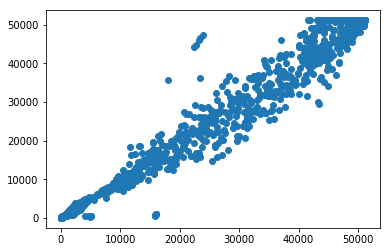

In [13]:
y_train_test_weather = model.predict(X_train_weather)
plt.scatter(y_train_test_weather,y_train)
mse = mean_squared_error(y_train_test_weather, y_train)
print mse

In [35]:
explained_variance_score(y_train, y_train_test_weather)  

0.9950704579396751

In [42]:
r2_score(y_train, y_train_test_weather)  

0.995070223113988

In [14]:
"""plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()"""

"plt.plot(history.history['loss'])\n#plt.plot(history.history['val_loss'])\nplt.title('model loss')\nplt.ylabel('loss')\nplt.xlabel('epoch')\nplt.legend(['train', 'test'], loc='upper left')\nplt.show()"

### Stationary Model 

In [15]:
"""
# Splitting the dataset into the Training set and Test set
#X_train, X_test, y_train, y_test = train_test_split(X_train_stationary, Wearable, test_size = 0.2, random_state = 0)
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

# Initialising the ANN
model2 = Sequential()

# Adding the input layer and the first hidden layer
model2.add(Dense(32, activation = 'relu', input_dim = 6))

# Adding the second hidden layer
model2.add(Dense(units = 32, activation = 'relu'))

# Adding the third hidden layer
model2.add(Dense(units = 32, activation = 'relu'))

# Adding the output layer

model2.add(Dense(units = 6))

adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.001, amsgrad=False)
# Compiling the ANN
model2.compile(optimizer = adadelta , loss = 'mean_squared_error')

# Fitting the ANN to the Training set
history = model2.fit(X_train_stationary, y_train, batch_size = 16, epochs = 200)"""

"\n# Splitting the dataset into the Training set and Test set\n#X_train, X_test, y_train, y_test = train_test_split(X_train_stationary, Wearable, test_size = 0.2, random_state = 0)\n#sc = StandardScaler()\n#X_train = sc.fit_transform(X_train)\n#X_test = sc.transform(X_test)\n\n# Initialising the ANN\nmodel2 = Sequential()\n\n# Adding the input layer and the first hidden layer\nmodel2.add(Dense(32, activation = 'relu', input_dim = 6))\n\n# Adding the second hidden layer\nmodel2.add(Dense(units = 32, activation = 'relu'))\n\n# Adding the third hidden layer\nmodel2.add(Dense(units = 32, activation = 'relu'))\n\n# Adding the output layer\n\nmodel2.add(Dense(units = 6))\n\nadam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.001, amsgrad=False)\n# Compiling the ANN\nmodel2.compile(optimizer = adadelta , loss = 'mean_squared_error')\n\n# Fitting the ANN to the Training set\nhistory = model2.fit(X_train_stationary, y_train, batch_size = 16, epochs = 200)"

In [16]:
"""from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression,Lasso,Ridge
ll = Lasso(alpha=0.1)
ll.fit(X_train_stationary, y_train)
y_train_test_stationary = ll.predict(X_train_stationary)"""


'from sklearn.datasets import load_boston\nfrom sklearn.linear_model import LinearRegression,Lasso,Ridge\nll = Lasso(alpha=0.1)\nll.fit(X_train_stationary, y_train)\ny_train_test_stationary = ll.predict(X_train_stationary)'

In [17]:
model2 = RandomForestRegressor()
model2.fit(X_train_stationary,y_train)
y_train_test_stationary = model2.predict(X_train_stationary)

26695194.306257725


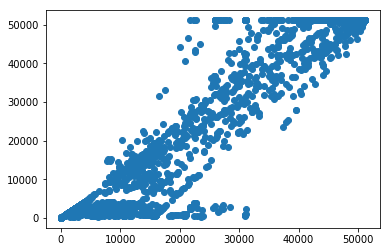

In [18]:
#y_train_test_stationary = model2.predict(X_train_stationary)
plt.scatter(y_train_test_stationary,y_train)
mse = mean_squared_error(y_train_test_stationary, y_train)
print mse

In [36]:
explained_variance_score(y_train, y_train_test_stationary)  

0.9523174476774384

In [43]:
r2_score(y_train, y_train_test_stationary)  

0.9522615180660771

In [19]:
"""
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()"""

"\nplt.plot(history.history['loss'])\n#plt.plot(history.history['val_loss'])\nplt.title('model loss')\nplt.ylabel('loss')\nplt.xlabel('epoch')\nplt.legend(['train', 'test'], loc='upper left')\nplt.show()"

### Weighted Function
https://machinelearningmastery.com/ensemble-machine-learning-algorithms-python-scikit-learn/

In [20]:
y_train_weather = pd.DataFrame(y_train_test_weather)
y_train_stationary = pd.DataFrame(y_train_test_stationary)
X_train_pred = pd.concat([y_train_weather, y_train_stationary],axis=1)


In [21]:
#Pred = [y_pred_weather,y_pred_wearable]
#X_train, X_test, y_train, y_test = train_test_split(train_pred, y_test, test_size = 0.2, random_state = 0)
adadelta = keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
classifier = Sequential()
# Adding the Single Perceptron or Shallow network
classifier.add(Dense(50,activation='relu', input_dim=12))
# Adding dropout to prevent overfitting
#classifier.add(Dropout(p=0.1))
# Adding the output layer
classifier.add(Dense(output_dim=6)) 
classifier.compile(optimizer = adadelta, loss = 'mean_squared_error')
#history = classifier.fit(X_train_pred, y_train, validation_data=(X_test,y_test),batch_size=10, nb_epoch=150)
history = classifier.fit(X_train_pred, y_train, batch_size=10, nb_epoch=500)


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=6)`
  # Remove the CWD from sys.path while we load stuff.
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:13: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  del sys.path[0]


Epoch 1/500
926/926 [==============================] - 1s 570us/step - loss: 245913321.1671
Epoch 2/500
926/926 [==============================] - 0s 175us/step - loss: 9632976.0907
Epoch 3/500
926/926 [==============================] - 0s 169us/step - loss: 6956472.8139
Epoch 4/500
926/926 [==============================] - 0s 165us/step - loss: 6497686.0731
Epoch 5/500
926/926 [==============================] - 0s 145us/step - loss: 5795486.7702
Epoch 6/500
926/926 [==============================] - 0s 140us/step - loss: 5397141.0591
Epoch 7/500
926/926 [==============================] - ETA: 0s - loss: 5575672.426 - 0s 130us/step - loss: 5201734.0025
Epoch 8/500
926/926 [==============================] - 0s 135us/step - loss: 4760498.6732
Epoch 9/500
926/926 [==============================] - 0s 134us/step - loss: 4667207.5364
Epoch 10/500
926/926 [==============================] - 0s 134us/step - loss: 4497975.3321
Epoch 11/500
926/926 [==============================] - 0s 130us/st

926/926 [==============================] - 0s 143us/step - loss: 2651228.8704
Epoch 91/500
926/926 [==============================] - 0s 122us/step - loss: 2550665.2785
Epoch 92/500
926/926 [==============================] - 0s 119us/step - loss: 2626432.3649
Epoch 93/500
926/926 [==============================] - 0s 117us/step - loss: 2351612.4422
Epoch 94/500
926/926 [==============================] - 0s 114us/step - loss: 2639989.7981
Epoch 95/500
926/926 [==============================] - 0s 117us/step - loss: 2368299.1308
Epoch 96/500
926/926 [==============================] - 0s 143us/step - loss: 2429428.7501
Epoch 97/500
926/926 [==============================] - 0s 141us/step - loss: 2708733.4617
Epoch 98/500
926/926 [==============================] - 0s 120us/step - loss: 2641673.4926
Epoch 99/500
926/926 [==============================] - 0s 123us/step - loss: 2552815.7204
Epoch 100/500
926/926 [==============================] - 0s 117us/step - loss: 2544995.0041
Epoch 101/5

926/926 [==============================] - 0s 137us/step - loss: 2110036.2372
Epoch 180/500
926/926 [==============================] - 0s 148us/step - loss: 2218630.6061
Epoch 181/500
926/926 [==============================] - 0s 243us/step - loss: 2232025.7901
Epoch 182/500
926/926 [==============================] - 0s 188us/step - loss: 2274077.4880
Epoch 183/500
926/926 [==============================] - 0s 145us/step - loss: 2233388.9025
Epoch 184/500
926/926 [==============================] - 0s 131us/step - loss: 2090896.4865
Epoch 185/500
926/926 [==============================] - 0s 124us/step - loss: 2140492.7677
Epoch 186/500
926/926 [==============================] - 0s 123us/step - loss: 2550206.9682
Epoch 187/500
926/926 [==============================] - 0s 187us/step - loss: 2189932.1051
Epoch 188/500
926/926 [==============================] - 0s 144us/step - loss: 2111716.7749
Epoch 189/500
926/926 [==============================] - 0s 128us/step - loss: 2255921.2656
Ep

926/926 [==============================] - 0s 152us/step - loss: 2259491.1457
Epoch 268/500
926/926 [==============================] - 0s 198us/step - loss: 2078614.5305
Epoch 269/500
926/926 [==============================] - 0s 129us/step - loss: 2029119.4869
Epoch 270/500
926/926 [==============================] - 0s 126us/step - loss: 2001089.0748
Epoch 271/500
926/926 [==============================] - 0s 122us/step - loss: 2028985.5881
Epoch 272/500
926/926 [==============================] - 0s 120us/step - loss: 2021731.4116
Epoch 273/500
926/926 [==============================] - 0s 134us/step - loss: 2113497.9284
Epoch 274/500
926/926 [==============================] - 0s 238us/step - loss: 1963790.8423
Epoch 275/500
926/926 [==============================] - 0s 216us/step - loss: 1950825.2147
Epoch 276/500
926/926 [==============================] - 0s 155us/step - loss: 2067201.0482
Epoch 277/500
926/926 [==============================] - 0s 146us/step - loss: 1920735.2614
Ep

926/926 [==============================] - 0s 156us/step - loss: 1914037.8058
Epoch 357/500
926/926 [==============================] - 0s 125us/step - loss: 1942738.6241
Epoch 358/500
926/926 [==============================] - 0s 128us/step - loss: 1923436.3440
Epoch 359/500
926/926 [==============================] - 0s 131us/step - loss: 1990941.1712
Epoch 360/500
926/926 [==============================] - 0s 225us/step - loss: 1900617.4936
Epoch 361/500
926/926 [==============================] - 0s 220us/step - loss: 1871069.5768
Epoch 362/500
926/926 [==============================] - 0s 149us/step - loss: 1907048.5085
Epoch 363/500
926/926 [==============================] - 0s 181us/step - loss: 1905922.5168
Epoch 364/500
926/926 [==============================] - 0s 219us/step - loss: 1913559.2472
Epoch 365/500
926/926 [==============================] - 0s 237us/step - loss: 1928201.4786
Epoch 366/500
926/926 [==============================] - 0s 162us/step - loss: 1896277.5069
Ep

926/926 [==============================] - 0s 213us/step - loss: 1797942.8916
Epoch 445/500
926/926 [==============================] - 0s 231us/step - loss: 1886112.8276
Epoch 446/500
926/926 [==============================] - 0s 244us/step - loss: 1828611.9339
Epoch 447/500
926/926 [==============================] - 0s 188us/step - loss: 1750436.0948
Epoch 448/500
926/926 [==============================] - 0s 163us/step - loss: 1780724.8153
Epoch 449/500
926/926 [==============================] - 0s 191us/step - loss: 1749803.6408
Epoch 450/500
926/926 [==============================] - 0s 149us/step - loss: 1844535.2811
Epoch 451/500
926/926 [==============================] - 0s 155us/step - loss: 1767582.8805
Epoch 452/500
926/926 [==============================] - 0s 150us/step - loss: 1751411.4807
Epoch 453/500
926/926 [==============================] - 0s 144us/step - loss: 1816691.8627
Epoch 454/500
926/926 [==============================] - 0s 175us/step - loss: 1804508.2220
Ep

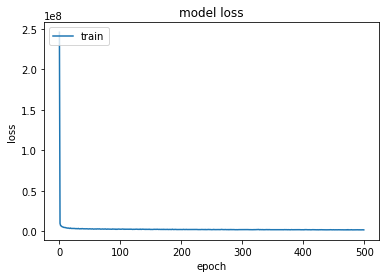

In [22]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### weather prediction

In [23]:
"""y_pred_weather = model.predict(X_test_weather)

plt.scatter(y_test,y_pred_weather, color = 'red')
plt.title('weather only')
plt.legend()
plt.show()
mse = mean_squared_error(y_test, y_pred_weather)
print mse """

"y_pred_weather = model.predict(X_test_weather)\n\nplt.scatter(y_test,y_pred_weather, color = 'red')\nplt.title('weather only')\nplt.legend()\nplt.show()\nmse = mean_squared_error(y_test, y_pred_weather)\nprint mse "

16880306.91569856


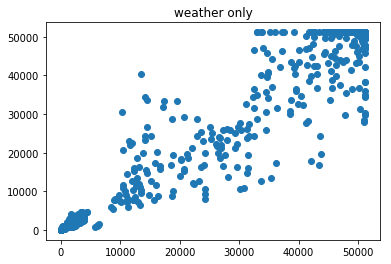

In [24]:
# Get the mean absolute error on the validation data
y_pred_weather = model.predict(X_test_weather)
plt.scatter(y_pred_weather,y_test)
mse = mean_squared_error(y_pred_weather, y_test)
plt.title('weather only')
print mse

In [37]:
explained_variance_score(y_test, y_pred_weather)  

0.9676194444037454

In [44]:
r2_score(y_test, y_pred_weather)  

0.9674621701274284

### stationary prediction

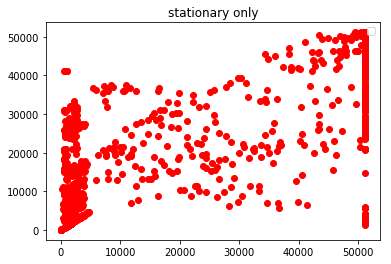

160485785.7238865


In [25]:
#y_pred_stationary = model2.predict(X_test_stationary)
y_pred_stationary = model2.predict(X_test_stationary)
plt.scatter(y_test,y_pred_stationary, color = 'red')
plt.title('stationary only')
plt.legend()
plt.show()
mse2 = mean_squared_error(y_test, y_pred_stationary)
print mse2 

In [39]:
explained_variance_score(y_test, y_pred_stationary)  
### this also means that random forest overfit the training dataset

0.6918959473812194

In [46]:
r2_score(y_test, y_pred_stationary)  

0.6904004502984105

In [26]:
y_test_weather = pd.DataFrame(y_pred_weather)
y_test_stationary = pd.DataFrame(y_pred_stationary)
X_pred = pd.concat([y_test_weather, y_test_stationary],axis=1)
y_pred = classifier.predict(X_pred)

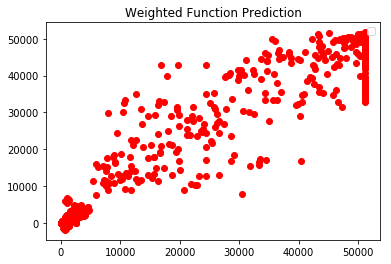

In [27]:
plt.scatter(y_test,y_pred, color = 'red')
plt.title('Weighted Function Prediction')
plt.legend()
plt.show()

In [28]:
mse3 = mean_squared_error(y_test, y_pred)
print mse3 

18377713.067841355


In [38]:
explained_variance_score(y_test, y_pred)  

0.964907339612418

In [45]:
r2_score(y_test, y_pred)  

0.9646064832839967

### plot loss history

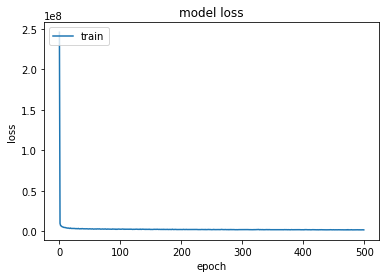

In [29]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [30]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression,Lasso,Ridge
ll = Lasso(alpha=0.1)
ll.fit(X_train, y_train)
pred2 = ll.predict(X_test)
mse2 = mean_squared_error(y_test,pred2)
print mse2

62853365.148184426


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


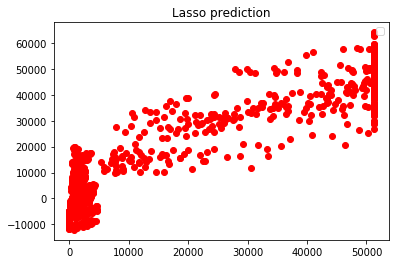

In [31]:
plt.scatter(y_test,pred2, color = 'red')
plt.title('Lasso prediction')
plt.legend()
plt.show()

In [40]:
explained_variance_score(y_test, pred2)  

0.8786319662698204

In [47]:
r2_score(y_test, pred2)    

0.8786097375633194

### random forest for weather - same mse as MLP

17687661.274052523


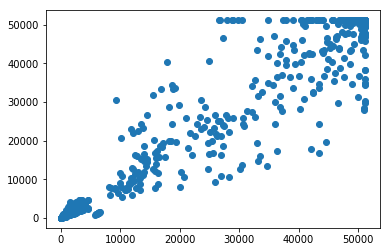

In [32]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train_weather,y_train)

# Get the mean absolute error on the validation data
y_test_weather = model.predict(X_test_weather)
plt.scatter(y_test_weather,y_test)
mse = mean_squared_error(y_test_weather, y_test)
print mse

In [33]:
y_train_test_stationary.shape,y_tra

NameError: name 'y_tra' is not defined